In [1]:
import collections
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
season16_17 = DictReader(open('podatki/season-1617_csv.csv', 'rt', encoding='utf-8'))
season17_18 = DictReader(open('podatki/season-1718_csv.csv', 'rt', encoding='utf-8'))
season18_19 = DictReader(open('podatki/season-1819_csv.csv', 'rt', encoding='utf-8'))

In [3]:
class Referee:
    '''
    Podatki na voljo v zvezi s sodnikom:
        Referee = Match Referee
        HF = Home Team Fouls Committed
        AF = Away Team Fouls Committed
        HO = Home Team Offsides
        AO = Away Team Offsides
        HY = Home Team Yellow Cards
        AY = Away Team Yellow Cards
        HR = Home Team Red Cards
        AR = Away Team Red Cards
        HBP = Home Team Bookings Points (10 = yellow, 25 = red)
        ABP = Away Team Bookings Points (10 = yellow, 25 = red)
    '''

    # dict  {ime priimek: objekt}
    # dict[imepriimek].refereed_games

    def __init__(self, name):
        # Ime sodnika v formatu "'Prva črka imena' Priimek"

        self.name = name

        # Sojene tekme: tekme v katerih je bil glaven sodnik
        # Dodajajo se objekti "Match"
        self.refereed_games = []

        # Rumeni kartoni (razdeljeni na domače/goste):
        self.yellow_cards_home = 0
        self.yellow_cards_away = 0

        # Rdeči kartoni:
        self.red_cards_home = 0
        self.red_cards_away = 0

        # Skupno število točk od kartonov (10 = rumen, 25 = rdeč)
        self.booking_points = 0

        #Sojeni prekrški
        self.home_team_fouls = 0
        self.away_team_fouls = 0

    def add_all(self, cards, match):
        self.add_cards(cards)
        self.add_match(match)
        
    def add_cards(self, cards):
        # cards seznam kartonov v formatu [hy, ay, hr, ar]
        hy = int(cards[0])
        ay = int(cards[1])
        hr = int(cards[2])
        ar = int(cards[3])
        self.yellow_cards_home += hy
        self.yellow_cards_away += ay
        self.red_cards_home += hr
        self.red_cards_away += ar

        self.booking_points += (hy + ay) * 10 + (hr + ar) * 25

    def add_match(self, match):
        self.refereed_games.append(match)

    def to_string(self):
        return(self.name)
    def get_cards(self):
        return([self.yellow_cards_home+self.yellow_cards_away, self.red_cards_home+self.red_cards_away])

    
    
    
class Match:
    '''
     Podatki na voljo:
        Div = League Division
        Date = Match Date (dd/mm/yy)
        HomeTeam = Home Team
        AwayTeam = Away Team
        FTHG = Full Time Home Team Goals
        FTAG = Full Time Away Team Goals
        FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
        HTHG = Half Time Home Team Goals
        HTAG = Half Time Away Team Goals
        HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

        Match Statistics (where available)
        Attendance = Crowd Attendance
        Referee = Match Referee
        HTS = Home Team Shots
        ATS = Away Team Shots
        HST = Home Team Shots on Target
        AST = Away Team Shots on Target
        HHW = Home Team Hit Woodwork
        AHW = Away Team Hit Woodwork
        HC = Home Team Corners
        AC = Away Team Corners
        HF = Home Team Fouls Committed
        AF = Away Team Fouls Committed
        HO = Home Team Offsides
        AO = Away Team Offsides
        HY = Home Team Yellow Cards
        AY = Away Team Yellow Cards
        HR = Home Team Red Cards
        AR = Away Team Red Cards
    '''

    def __init__(self, date, home_team, away_team, fthg, ftag, ftr, hthg, 
                 htr, hts, ats, hst, ast, hc, ac, hf, af, hy, ay, hr, ar):
        self.date = date
        self.home_team = home_team
        self.away_team = away_team
        self.fthg = fthg
        self.ftag = ftag
        self.ftr = ftr
        self.hthg = hthg
        self.htr = htr
        self.hts = hts
        self.ats = ats
        self.hst = hst
        self.ast = ast
        self.hc = hc
        self.ac = ac
        self.hf = hf
        self.af = af
        self.hy = hy
        self.ay = ay
        self.hr = hr
        self.ar = ar


    def to_string(self):
        out = "{} {}{} - {}{}".format(self.date, self.home_team, self.fthg, self.ftag, self.away_team)
        return out


class Team:
    '''
        Div = League Division
        Date = Match Date (dd/mm/yy)
        FTHG = Full Time Home Team Goals
        FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
        HTHG = Half Time Home Team Goals
        HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

        Match Statistics (where available)
        Attendance = Crowd Attendance
        Referee = Match Referee
        HS = Home Team Shots
        HST = Home Team Shots on Target
        HHW = Home Team Hit Woodwork
        HC = Home Team Corners
        HF = Home Team Fouls Committed
        HO = Home Team Offsides
        HY = Home Team Yellow Cards
        HR = Home Team Red Cards
        HBP = Home Team Bookings Points (10 = yellow, 25 = red)


    '''


    def __init__(self, name, division, ):
        self.name = name
        self.division = division
        self.goals_scored = 0
        self.goals_conceded = 0
        self.yellow_cards = 0
        self.red_cards = 0
        self.points = 0
        self.win = 0
        self.loss = 0
        self.draw = 0
        
    def add_all(self, gs, gc, yc, rc):
        self.goals_scored += int(gs)
        self.goals_conceded += int(gc)
        self.yellow_cards += int(yc)
        self.red_cards += int(rc)
        
        if gs > gc:
            #self.win += 1
            self.points += 3
        if gs == gc:
            #self.draw += 1
            self.points += 1        
        else:
            pass
            #self.loss += 1
        
    def to_string(self):
        return "{} {}".format(self.name, self.division)

    


In [4]:
sezone_referees = []
sezone_teams = []
#referee_dict = {}
# {"Ime ekipe": objekt}
# teams_dict = defaultdict(Team)
#teams_dict = {}

def read_data(data):
    referee_dict = {}
    teams_dict = {}
    for row in data:
        div = row["Div"]
        date = row["Date"]
        home_team = row["HomeTeam"]
        away_team = row["AwayTeam"]
        #home_hit_woodwork = row["HHW"]
        #away_hit_woodwork = row["AHW"]
        full_time_home_goals = row["FTHG"]
        full_time_away_goals = row["FTAG"]
        full_time_result = row["FTR"]
        half_time_home_goals = row["HTHG"]
        htag = row["HTAG"]
        half_time_result = row["HTR"]
        referee = row["Referee"]
        hts = row["HS"]
        ats = row["AS"]
        hst = row["HST"]
        ast = row["AST"]
        home_fouls = row["HF"]
        af = row["AF"]
        #home_team_offsides = row["HO"]
        #away_team_offsides = row["AO"]
        hc = row["HC"]
        ac = row["AC"]
        home_yellow = row["HY"]
        away_yellow = row["AY"]
        home_red = row["HR"]
        away_red = row["AR"]

        # print(referee)
        # print(curr_referee.to_string())
        curr_referee = ""
        curr_match = ""

        try:
            curr_referee = referee_dict[referee]
        except KeyError:
            curr_referee = Referee(referee)
            referee_dict[referee] = curr_referee

        curr_match = Match(date, home_team, away_team, full_time_home_goals, full_time_away_goals, full_time_result,
                           half_time_home_goals, half_time_result, hts, ats,
                           hst, ast, hc, ac, home_fouls, af, home_yellow, away_yellow, home_red, away_red)

        referee_dict[referee].add_all([home_yellow, away_yellow, home_red, away_red], curr_match)
        curr_home_team = curr_away_team = ""
        
        try:
            curr_home_team = teams_dict[home_team]
            curr_away_team = teams_dict[away_team]
        except KeyError:
            curr_home_team = Team(home_team, div)
            curr_away_team = Team(away_team, div)

            teams_dict[home_team] = curr_home_team
            teams_dict[away_team] = curr_away_team
        
        if full_time_result == "H":
            curr_home_team.win += 1
            curr_away_team.loss += 1
        if full_time_result == "A":
            curr_home_team.loss += 1
            curr_away_team.win += 1    
        if full_time_result == "D":
            curr_home_team.draw += 1
            curr_away_team.draw += 1            
            
        curr_home_team.add_all(full_time_home_goals, full_time_away_goals,
                               home_yellow, home_red)
        curr_away_team.add_all(full_time_away_goals, full_time_home_goals,
                               away_yellow, away_red)
        
    return(referee_dict, teams_dict)

    
referees, teams = read_data(season16_17)
sezone_referees.append(referees)
sezone_teams.append(teams)

referees, teams = read_data(season17_18)
sezone_referees.append(referees)
sezone_teams.append(teams)

referees, teams = read_data(season18_19)
sezone_referees.append(referees)
sezone_teams.append(teams)
# print(referee_dict.items())

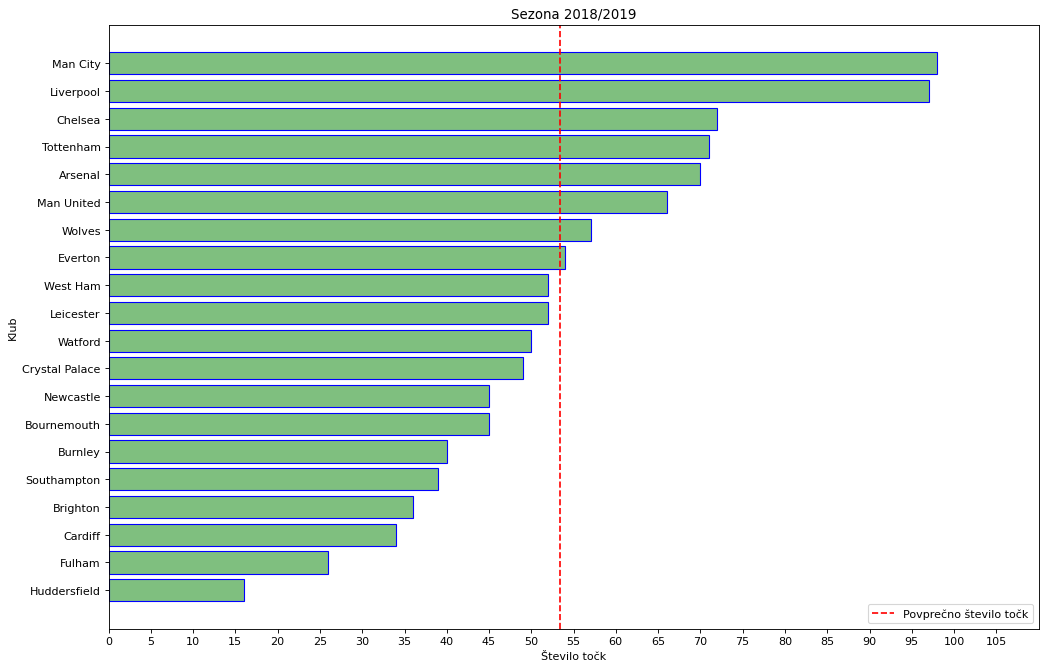

In [5]:
import pandas as pd
from matplotlib.pyplot import figure
import numpy as np
from matplotlib.pyplot import xticks

all_points = []
all_teams = []

for sezona in sezone_teams:
    label_teams = list(sezona.keys())
    all_teams.append(label_teams)
    label_object = sezona.values()
    temp = []
    for team in label_object:
        temp.append(int(team.points))
    all_points.append(temp)

#Prikažemo sam zadnjo sezono
last_season = zip([all_points[-1]], [all_teams[-1]])
    
for p, t in last_season:
    p, t = zip(*sorted([[a,b] for a, b in zip(p, t)], key=lambda item: item[0], reverse=False))
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    xticks(np.arange(0, max(p)+10, step=5))
    
    plt.title("Sezona 2018/2019")
    plt.ylabel("Klub")
    plt.xlabel("Število točk")
    
    plt.barh(t, p,color=(0, 0.5, 0, 0.5), edgecolor='blue')
    plt.axvline(x=np.mean(p), label="Povprečno število točk", c='r', linestyle="--")

    plt.xlim([0,110])
    plt.legend(loc='lower right')

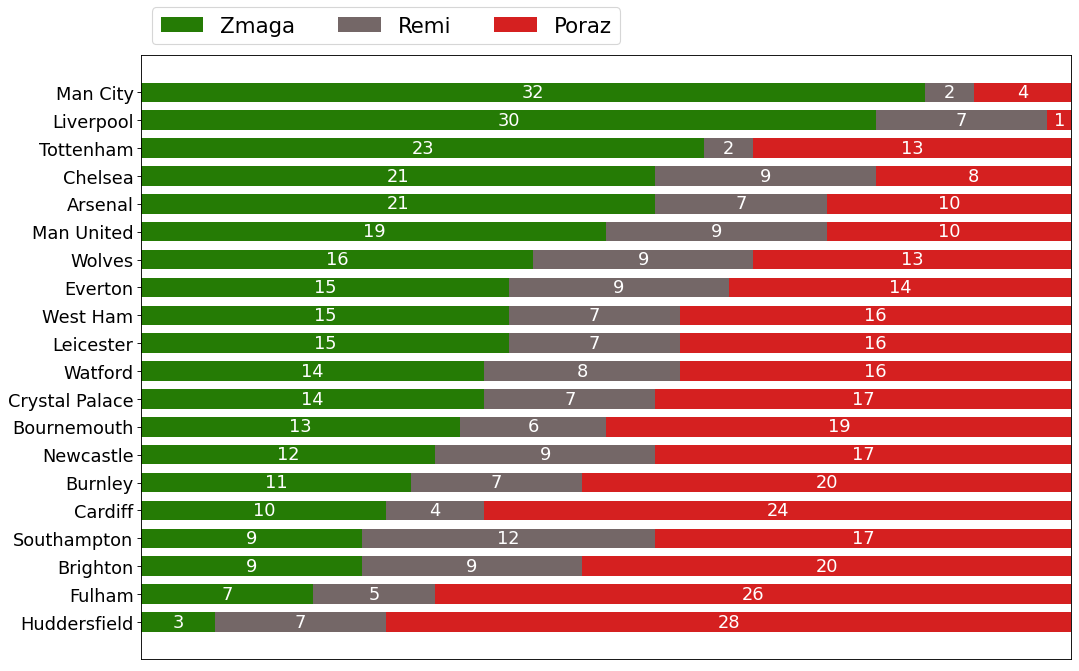

In [173]:
results = defaultdict(list)
for k, v in sezone_teams[-1].items():
    results[k] = [v.win, v.draw, v.loss]
cat = ['Zmaga', 'Remi', 'Poraz']

results = {k:v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=False)}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

    xticks([])
    plt.xlim([0,38])

    
    category_colors = [
        [37/255, 123/255, 5/255, 1],
        [116/255, 103/255, 103/255, 1],
        [213/255, 32/255, 32/255, 1]
        
    ]
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        plt.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            plt.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
            plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='large')

survey(results, cat)
plt.show()

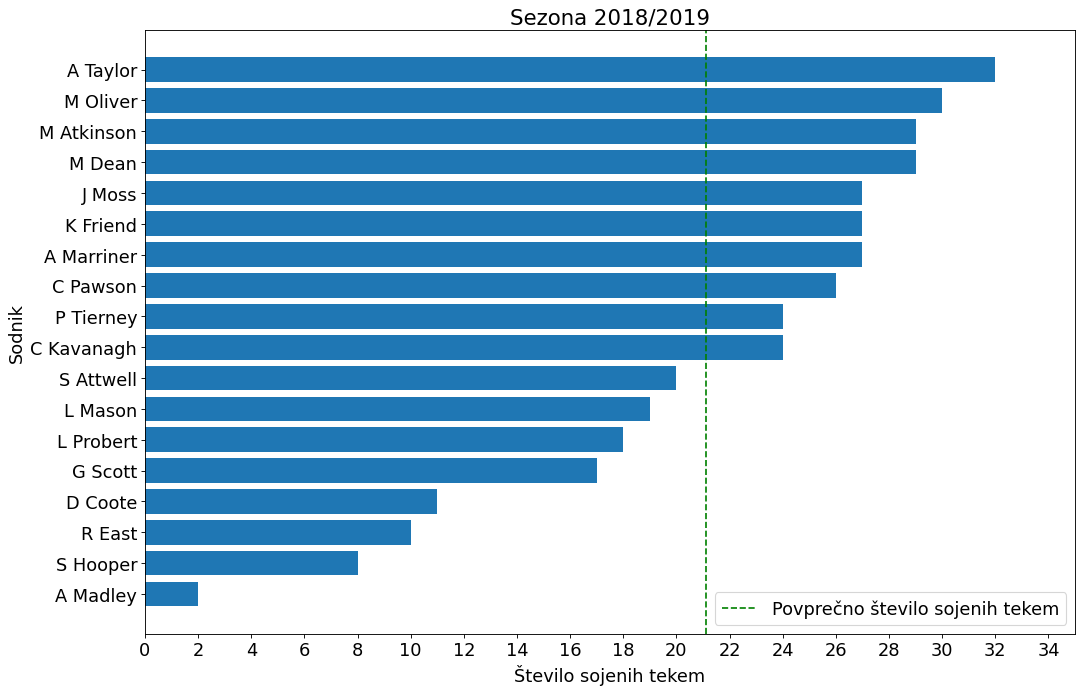

In [238]:

season_labels = ["2016/2017", "2017/2018", "2018/2019"]

last_season = [sezone_referees[-1]]
for i, season in enumerate(last_season):
    season = sorted([(k,v) for k,v in season.items()], key=lambda item: len(item[1].refereed_games),reverse=False)
    sodniki = [k for k,v in season]
    tekme = [len(v.refereed_games) for k,v in season]
    

    
    figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    
    xticks(np.arange(0, max(tekme)+5, step=2))

    
    plt.title("Sezona 2018/2019")
    plt.ylabel("Sodnik")
    plt.xlabel("Število sojenih tekem")
    
    plt.barh(sodniki, tekme)
    plt.axvline(x=np.mean(tekme), label="Povprečno število sojenih tekem", c='g', linestyle="--")
    plt.xlim([0,35])
    plt.legend(loc='lower right')
plt.show()
    
    

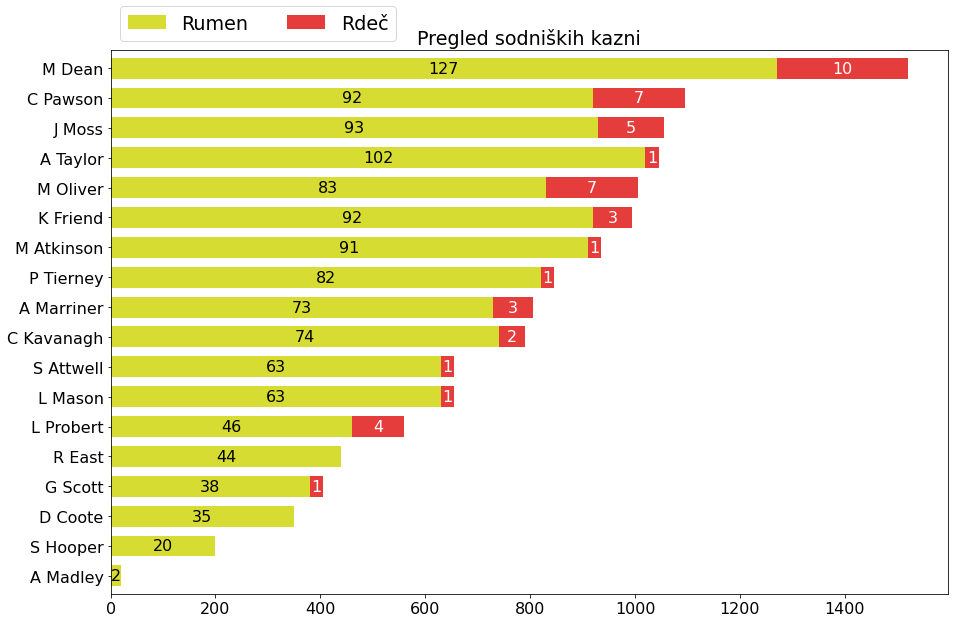

In [237]:
season_labels = ["2016/2017", "2017/2018", "2018/2019"]

last_season = [sezone_referees[-1]]
for i, season in enumerate(last_season):
    season = sorted([(k,v) for k,v in season.items()], key=lambda item: item[1].booking_points,reverse=False)
    sodniki = [k for k,v in season]
        
    kartoni = [v.booking_points for k,v in season]
        
    fig, ax = plt.subplots(facecolor='white', figsize=(15,10), edgecolor='k')
    
    
    width = 0.9
    
    yellows = [v.get_cards()[0]*10 for k, v in season]
    red = [v.get_cards()[1]*25 for k, v in season]
        
    category_colors = [
        [215/255, 220/255, 50/255, 1],
        [229/255, 60/255, 60/255, 1]
    ]    
        
    
    df0 = pd.DataFrame({'Rumen':yellows,'Rdeč':red}, columns=['Rumen', 'Rdeč'],
                       index=sodniki)
    df0.plot.barh(ax=ax, stacked=True, color=category_colors, width=0.7)
    
    plt.title("Pregled sodniških kazni")
    plt.legend(ncol=2, bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='large')
    
    
    for y, (yellow, redC) in enumerate(zip(yellows, red)):        
        ax.text(yellow/2, y, str(int(yellow/10)), ha='center', va='center',
                    color='black')
        if redC > 0:
             ax.text(yellow + redC/2, y, str(int(redC/25)), ha='center', va='center',
                     color='white')     
                
    
plt.show()

In [ ]:
#tornado plot, average na sredin, desno tisti nad povprečje, levo pod povprečjem

category_names = ["Yellow cards", "Red cards"]
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())